In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle 

In [3]:
with open(r"C:\Users\Sangeeta\Downloads\P74-Project-5\Project 5\traffic-signs-data\train.p",mode='rb') as training_data:
    train=pickle.load(training_data)

In [4]:
with open(r"C:\Users\Sangeeta\Downloads\P74-Project-5\Project 5\traffic-signs-data\valid.p",mode='rb') as validation_data:
    valid=pickle.load(validation_data)

In [5]:
with open(r"C:\Users\Sangeeta\Downloads\P74-Project-5\Project 5\traffic-signs-data\test.p",mode='rb') as testing_data:
    test=pickle.load(testing_data)

In [6]:
X_train,y_train=train['features'],train['labels']
X_validation,y_validation=valid['features'],valid['labels']
X_test,y_test=test['features'],test['labels']

In [7]:
#IMAGE EXPLORATION

np.uint8(36)

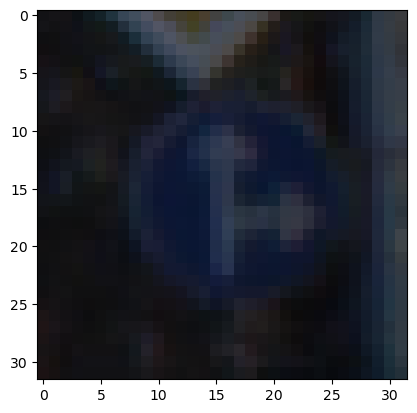

In [8]:
i=1000
plt.imshow(X_train[i])
y_train[i]

np.uint8(17)

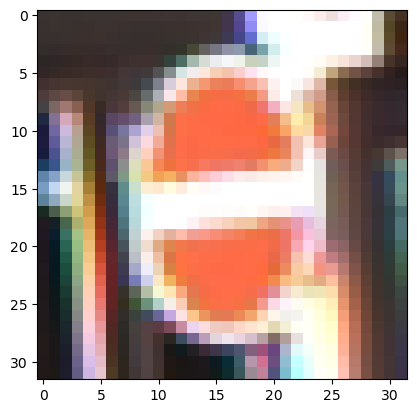

In [9]:
i=4000
plt.imshow(X_validation[i])
y_validation[i]

In [10]:
y_validation.shape

(4410,)

In [11]:
y_test.shape

(12630,)

In [12]:
#Data preparation:
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train)

In [22]:
#Red,Gray and BLue channels are there-convertion from coloured to gray scale
x_train_gray=np.sum(X_train/3,axis=3,keepdims=True)
x_test_gray=np.sum(X_test/3,axis=3,keepdims=True)
X_validation_gray=np.sum(X_validation,axis=3,keepdims=True)

In [17]:
x_train_gray.shape

(34799, 32, 32, 1)

In [21]:
X_train_gray_norm=(x_train_gray-128)/128 #Normalised data from 0-1

In [20]:
X_train_gray_norm

array([[[[-0.13020833],
         [-0.23958333],
         [-0.19010417],
         ...,
         [-0.2734375 ],
         [-0.22135417],
         [-0.2578125 ]],

        [[-0.1640625 ],
         [-0.2578125 ],
         [-0.24739583],
         ...,
         [-0.27604167],
         [-0.27083333],
         [-0.33854167]],

        [[-0.20833333],
         [-0.26302083],
         [-0.23697917],
         ...,
         [-0.29166667],
         [-0.30208333],
         [-0.36979167]],

        ...,

        [[-0.22135417],
         [-0.26302083],
         [-0.34375   ],
         ...,
         [-0.44270833],
         [-0.40104167],
         [-0.38541667]],

        [[-0.09114583],
         [-0.2421875 ],
         [-0.34635417],
         ...,
         [-0.203125  ],
         [-0.203125  ],
         [-0.15885417]],

        [[-0.0859375 ],
         [-0.25260417],
         [-0.31510417],
         ...,
         [ 0.15625   ],
         [ 0.19010417],
         [ 0.1953125 ]]],


       [[[-0.19010417],


In [25]:
X_test_gray_norm=(x_test_gray-128)/128 
X_validation_gray_norm=(X_validation_gray-128)/128 

<Figure size 640x480 with 0 Axes>

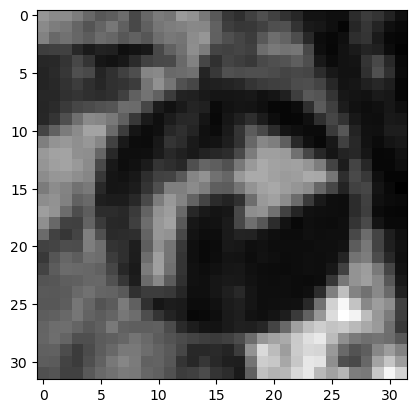

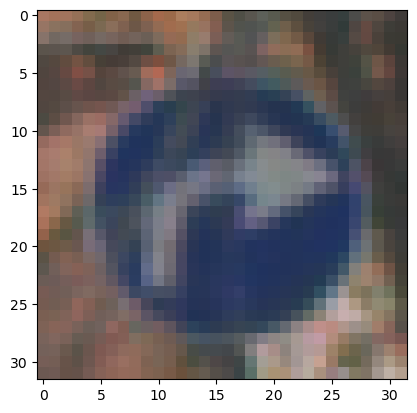

<Figure size 640x480 with 0 Axes>

In [28]:
i=610
plt.imshow(x_train_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i].squeeze(),cmap='gray')
plt.figure()

<Figure size 640x480 with 0 Axes>

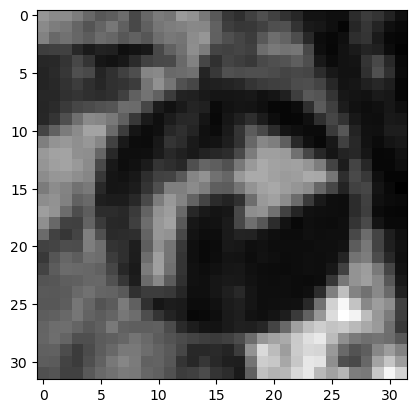

<Figure size 640x480 with 0 Axes>

In [32]:
plt.imshow(X_train_gray_norm[i].squeeze(),cmap='gray')
plt.figure()
#Squeeze command will remove the 1 dimensional aspect of it, and then the cmap-ensures the colourscale is grey

In [33]:
#MODEL BUILDING 

In [36]:
from keras.models import Sequential

In [37]:
from keras.layers import MaxPooling2D,AveragePooling2D,Conv2D,Dense,Flatten,Dropout
from keras.optimizers import Adam


In [45]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=6,kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
cnn_model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
cnn_model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=120,activation='relu'))
cnn_model.add(Dense(units=84,activation='relu'))
cnn_model.add(Dense(units=43,activation='softmax'))
              

In [51]:
cnn_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [52]:
cnn_model.fit(X_train_gray_norm,y_train,batch_size=500,epochs=5,verbose=1,validation_data=(X_validation_gray_norm,y_validation))

Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.1087 - loss: 3.4370 - val_accuracy: 0.0846 - val_loss: 275454738231721984.0000
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.4798 - loss: 1.9260 - val_accuracy: 0.1243 - val_loss: 740844269006225408.0000
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.7200 - loss: 1.0028 - val_accuracy: 0.1240 - val_loss: 1052472596194394112.0000
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.8187 - loss: 0.6667 - val_accuracy: 0.1399 - val_loss: 1228761418644324352.0000
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.8629 - loss: 0.5120 - val_accuracy: 0.1426 - val_loss: 1417536844895092736.0000


In [53]:
#Getting an accuracy of 865 is impressive with just 2 convoluted layers